In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotl
from scipy import stats
from scipy.stats import norm

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
setosa_df = df[df['Species'] == 'Iris-setosa']
setosa_df['Species'].unique()

array(['Iris-setosa'], dtype=object)

In [4]:
length_arr = np.array(setosa_df['SepalLengthCm'].values)
length_arr

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [5]:
alpha = 0.95
norm.ppf(1 - alpha/2)

0.06270677794321385

In [6]:
def remove_outliers(sample):
    mean = sample.mean()
    std = np.std(sample)
    outliers_array = []
    left_bound = mean - std * 3.5
    right_bound = mean + std * 3.5
    for index in range(0, len(sample)):
        item = sample[index]
        if item > right_bound or item < left_bound:
            outliers_array.append(item)
            np.delete(sample, index, 0)
    return sample

In [7]:
remove_outliers(length_arr)

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [8]:
def remove_outliers_iqr(sample):
    perc_25 = np.percentile(sample, 25)
    perc_75 = np.percentile(sample, 25)
    IQR = perc_75 - perc_25
    left_bound = perc_25 - IQR * 1.5
    right_bound = perc_75 + IQR * 1.5
    outliers_array = []
    for index in range(0, len(sample)):
        item = sample[index]
        if item > right_bound or item < left_bound:
            outliers_array.append(item)
            np.delete(sample, index, 0)
    return sample

In [9]:
remove_outliers_iqr(length_arr)

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

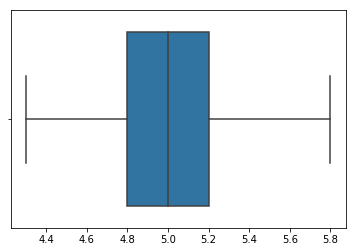

In [10]:
sns.boxplot(length_arr)